<a href="https://colab.research.google.com/github/ask-kawade/-Bike-Sharing-Demand-Prediction-Project/blob/main/Book_recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.


In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).
Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.
###Content
The Book-Crossing dataset comprises 3 files.


● Users

Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.

● Books

Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.


● Ratings

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0



In [1]:
# importing the important libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



sns.set()
# setting font weight,label weight,title weight to bold and setting title size,label size,fontsize.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [3]:
# CSV file location
file_path='/content/mydrive/MyDrive/Colab Notebooks/CAPSTONE PROJECTS/Book recommender system-Unsuperivised learning/data_book_recommendation/'

###  As we have 3 different data sets. Let's 1st Import all 3 data sets
##**1.Book's Data** 

In [4]:
# creating dataframe by reading the csv file.
books_df=pd.read_csv(file_path+'Books.csv',low_memory=False)

In [5]:
# first five rows
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
# last five rows
books_df.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


##**2.Rating's Data** 

In [7]:
# creating dataframe by reading the csv file.
ratings_df=pd.read_csv(file_path+'Ratings.csv')

In [8]:
#  first five rows
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [9]:
#last five rows
ratings_df.tail()

,User-ID,ISBN,Book-Rating
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10
1149779,276723,05162443314,8


##**3.User's Data** 

In [10]:
# creating dataframe by reading the csv file.
users_df=pd.read_csv(file_path+'Users.csv')

In [11]:
#first five rows
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [12]:
#last five rows
users_df.tail()

,User-ID,Location,Age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [13]:
# checking shape if each dataset
print("Shape for Book's data",books_df.shape)
print("Shape for rating's data",ratings_df.shape)
print("Shape for user's data",users_df.shape)

Shape for Book's data (271360, 8)
Shape for rating's data (1149780, 3)
Shape for user's data (278858, 3)


***Observations***
1. There are 271360 books.
2. There are 278858 Users who gave 1149780 ratings to the all books.

#**Data Wrangling:**

## **1) Book's Data**

In [14]:
# checking data types and null values present if any.
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


* ***total entries(rows)=271360***
* ***null value columns= Book-Author,Publisher,Image-URL-L***
* ***Dtype for Year of Pblication should be in integer***

In [15]:
books_df.shape

(271360, 8)

In [16]:
# as image-Urls are not useful for us. so will drop the those columns.
books_df.drop(labels=['Image-URL-S','Image-URL-M','Image-URL-L'],axis=1,inplace=True)

In [17]:
# Checking the null values in each column.
books_df.isnull().sum().sort_values(ascending=False)

Publisher              2
Book-Author            1
ISBN                   0
Book-Title             0
Year-Of-Publication    0
dtype: int64

In [18]:
books_df[books_df['Book-Author'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [19]:
# Replacing NAN value with 'Other'
books_df['Book-Author'].fillna('Other',inplace=True)
books_df['Publisher'].fillna('Other',inplace=True)

In [20]:
# succesfully handled the null values.
books_df.isnull().sum().sort_values(ascending=False)

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [21]:
# Checking Unique values 
print(books_df['Year-Of-Publication'].unique())

['2002' '2001' '1991' '1999' '2000' '1993' '1996' '1988' '2004' '1998'
 '1994' '2003' '1997' '1983' '1979' '1995' '1982' '1985' '1992' '1986'
 '1978' '1980' '1952' '1987' '1990' '1981' '1989' '1984' '0' '1968' '1961'
 '1958' '1974' '1976' '1971' '1977' '1975' '1965' '1941' '1970' '1962'
 '1973' '1972' '1960' '1966' '1920' '1956' '1959' '1953' '1951' '1942'
 '1963' '1964' '1969' '1954' '1950' '1967' '2005' '1957' '1940' '1937'
 '1955' '1946' '1936' '1930' '2011' '1925' '1948' '1943' '1947' '1945'
 '1923' '2020' '1939' '1926' '1938' '2030' '1911' '1904' '1949' '1932'
 '1928' '1929' '1927' '1931' '1914' '2050' '1934' '1910' '1933' '1902'
 '1924' '1921' '1900' '2038' '2026' '1944' '1917' '1901' '2010' '1908'
 '1906' '1935' '1806' '2021' '2012' '2006' 'DK Publishing Inc' 'Gallimard'
 '1909' '2008' '1378' '1919' '1922' '1897' '2024' '1376' '2037']


***As we can see there are few entries which are 'DK Publishing Inc' and 'Gallimard'.Looks like something is wrong. Let's check those entries***

In [22]:
books_df[books_df['Year-Of-Publication']=='DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


***Here we can observe that Year of Publication has not been recorded properly. Year of publication has been wrongly recorded in Book-Author column. Let's correct this issue.*** 

In [23]:
books_df.loc[books_df['ISBN']=='078946697X','Year-Of-Publication']=2000    #replacing existing value with 2000.
books_df.loc[books_df['ISBN']=='078946697X','Book-Author']='Michael Teitelbaum' #replacing existing value with 'Michael Teitelbaum' which was present in book title.
books_df.loc[books_df['ISBN']=='078946697X','Book-Title']='DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books_df.loc[books_df['ISBN']=='078946697X','Publisher']='DK Readers Inc'  #replacing existing value with 'DK Readers Inc' which was present in book title.


In [24]:
books_df.loc[books_df['ISBN']=='0789466953','Year-Of-Publication']=2000   #replacing existing value with 2000.
books_df.loc[books_df['ISBN']=='0789466953','Book-Author']='James Buckley'   #replacing existing value with 'James Buckley' which was present in book title.
books_df.loc[books_df['ISBN']=='0789466953','Book-Title']='DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books_df.loc[books_df['ISBN']=='0789466953','Publisher']='DK Readers Inc'      #replacing existing value with 'DK Readers Inc' which was present in book title.

In [25]:
books_df[books_df['Year-Of-Publication']=='Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [26]:
books_df.loc[books_df['ISBN']=='2070426769','Year-Of-Publication']=2003     #replacing existing value with 2003.
books_df.loc[books_df['ISBN']=='2070426769','Book-Author']='Jean-Marie Gustave Le ClÃ?Â©zio'  #replacing existing value with 'Jean-Marie Gustave Le ClÃ?Â©zio' which was present in book title.
books_df.loc[books_df['ISBN']=='2070426769','Book-Title']="Peuple du ciel, suivi de 'Les Bergers"
books_df.loc[books_df['ISBN']=='2070426769','Publisher']='Gallimard'     #replacing existing value with 'DK Readers Inc' which was present in book title.

In [27]:
books_df[((books_df['ISBN']=='0789466953') | (books_df['ISBN']=='2070426769'))]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Readers Inc


In [28]:
# lets convert year of publication to numeric/int
books_df['Year-Of-Publication']=pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')

In [29]:
# lets rename the columns
books_df.rename(columns={'Book-Title':'title','Book-Author':'author','Year-Of-Publication':'year_of_publication','Publisher':'publisher'},inplace=True)

In [30]:
# Checking duplicate values
books_df.duplicated().sum()

0

In [31]:
books_df.head(3)

,ISBN,title,author,year_of_publication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial


In [32]:
author_count_df=books_df['author'].value_counts().reset_index().rename(columns={'index':'author','author':'count'}).head(10)

In [33]:
author_count_df

,author,count
0,Agatha Christie,632
1,William Shakespeare,567
2,Stephen King,524
3,Ann M. Martin,423
4,Carolyn Keene,373
5,Francine Pascal,372
6,Isaac Asimov,330
7,Nora Roberts,315
8,Barbara Cartland,307
9,Charles Dickens,302


Text(0.5, 1.0, 'Top 10 Authors with highest book counts')

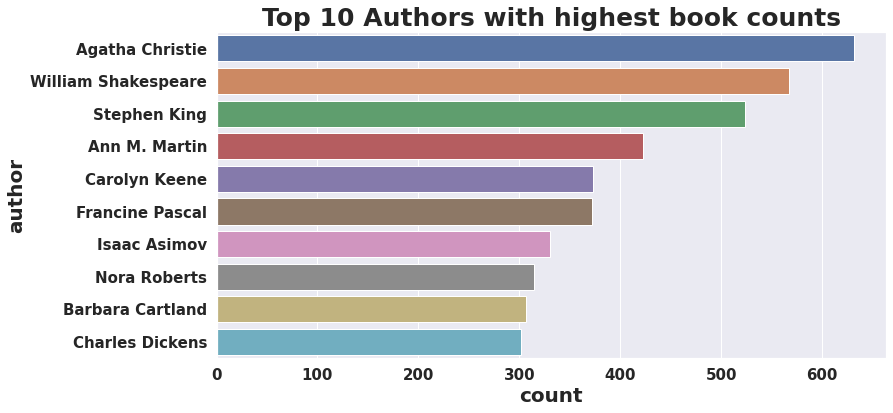

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(y=author_count_df['author'],x=author_count_df['count'])
plt.title('Top 10 Authors with highest book counts')

***Obseravtions***

***1)Agatha Christie, William Shakespeare and Stephen King are the top three Authors having highest book counts.***

In [35]:
publisher_count_df=books_df['publisher'].value_counts().reset_index().rename(columns={'index':'publisher','publisher':'count'}).head(10)
publisher_count_df

,publisher,count
0,Harlequin,7535
1,Silhouette,4220
2,Pocket,3905
3,Ballantine Books,3783
4,Bantam Books,3646
5,Scholastic,3160
6,Simon &amp; Schuster,2971
7,Penguin Books,2844
8,Berkley Publishing Group,2771
9,Warner Books,2727


Text(0.5, 1.0, 'Top 10 Publishers with highest published books')

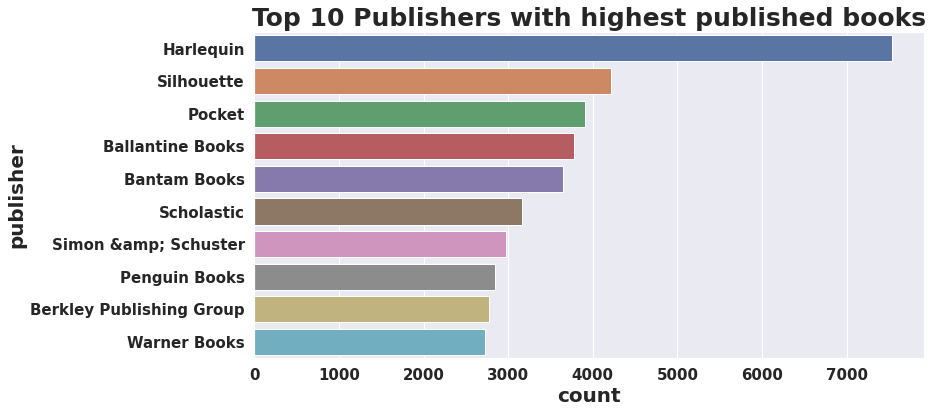

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(y=publisher_count_df['publisher'],x=publisher_count_df['count'])
plt.title('Top 10 Publishers with highest published books')

#**2) User's Data**

In [37]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [38]:
# Checking null values in users dataframe
users_null_count_df=users_df.isnull().sum().reset_index().rename(columns={'index':'columns',0:'null_count'})
users_null_count_df['percentage']=users_null_count_df['null_count']/len(users_df)*100
users_null_count_df

,columns,null_count,percentage
0,User-ID,0,0.000000
1,Location,0,0.000000
2,Age,110762,39.719857


Age has 39.71% null values. Lets explore age column.

In [39]:
users_df['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

Here we can see that age between 0 to 244. Here we will consider age range between 10 to 90.

In [40]:
# replacing values above 90 and below 10 with NAN value.
users_df.loc[((users_df['Age']<10) | (users_df['Age']>90),'Age')]=np.nan

In [41]:
# replacing NAN Values with mean 
users_df['Age']=users_df['Age'].fillna(users_df['Age'].mean())

In [42]:
# as values in age columns are in float data type so changing  the data type to integer
users_df['Age']=users_df['Age'].astype(np.int32)

In [43]:
# now checking the unique values.
users_df['Age'].unique()

array([34, 18, 17, 61, 26, 14, 25, 19, 46, 55, 32, 24, 20, 23, 51, 31, 21,
       44, 30, 57, 43, 37, 41, 54, 42, 50, 39, 53, 47, 36, 28, 35, 13, 58,
       49, 38, 45, 62, 63, 27, 33, 29, 66, 40, 15, 60, 79, 22, 16, 65, 59,
       48, 72, 56, 67, 80, 52, 69, 71, 73, 78, 64, 12, 74, 75, 76, 83, 68,
       11, 77, 70, 81, 10, 84, 82, 90, 85, 86, 87, 89, 88], dtype=int32)

In [44]:
users_df.shape

(278858, 3)

In [45]:
location_count_df=users_df['Location'].value_counts().reset_index().rename(columns={'index':'location','Location':"count"}).head(10)

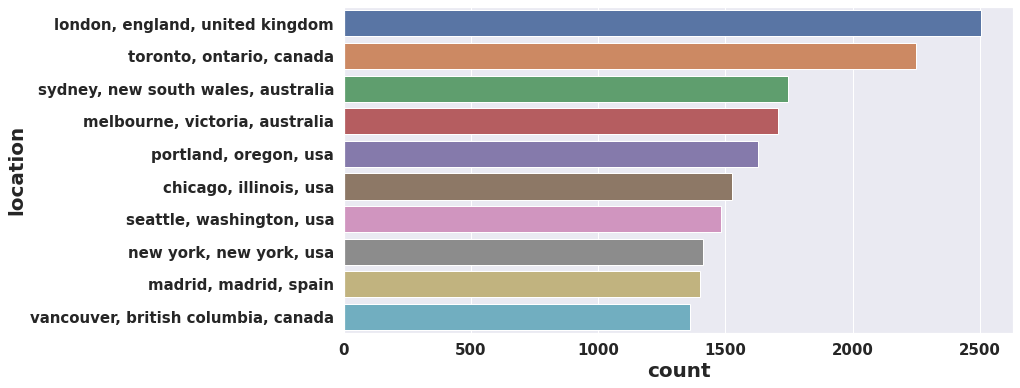

In [46]:
plt.figure(figsize=(12,6))
sns.barplot(x=location_count_df['count'],y=location_count_df['location'])

***Observations***

***1) Most of the users are from United Kingdom.***

***2) 2nd most users are from Canada.***

In [47]:
# let's rename the column names.
users_df.rename(columns={'User-ID':'id','Location':'location','Age':'age'},inplace=True)

# **3)Rating data**

In [48]:
# Checking the data types, null values and total entries 
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [49]:
# checking the null values
ratings_df.isnull().sum()

# no null values found 

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [50]:
# let's rename the columns
ratings_df.rename(columns={'User-ID':'id','Book-Rating':'rating'},inplace=True)

In [51]:
# Checking the range of ratings.
ratings_df['rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

Text(0.5, 1.0, 'Count of ratings')

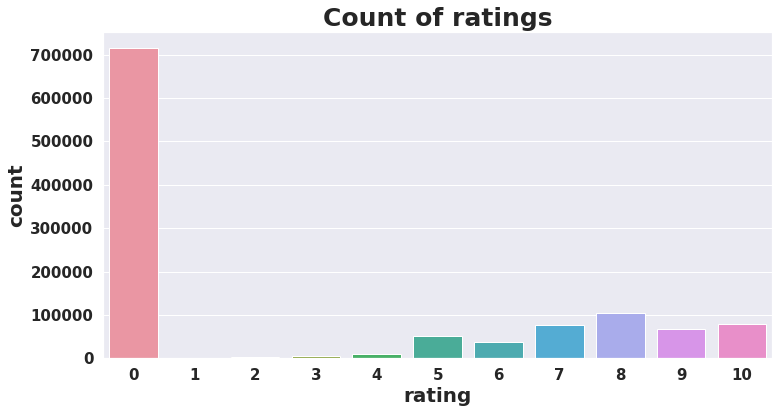

In [52]:
plt.figure(figsize=(12,6))
sns.countplot(ratings_df['rating'])
plt.title('Count of ratings')

* ***Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.***
* ***As most of the books has 0 ratings.That means people either did not read the books or least interested in rating the books.***
* ***Count of rating-8 is very high.***


## ***Books with 0 ratings are not useful for us. So we will be considering only explicit ratings.***

In [53]:
new_rating_df=ratings_df[ratings_df['rating']!=0]
new_rating_df

,id,ISBN,rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6
...,...,...,...
1149773,276704,0806917695,5
1149775,276704,1563526298,9
1149777,276709,0515107662,10
1149778,276721,0590442449,10


### ***Finally merging all 3 Dataframes***

In [56]:
books_df.head(1)

,ISBN,title,author,year_of_publication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press


In [57]:
new_rating_df.head(1)

,id,ISBN,rating
1,276726,0155061224,5


In [58]:
users_df.head(1)

,id,location,age
0,1,"nyc, new york, usa",34


In [64]:

final_df=pd.merge(new_rating_df,users_df,on='id')
final_df=final_df.merge(books_df,on="ISBN")
final_df.head()

,id,ISBN,rating,location,age,title,author,year_of_publication,publisher
0,276726,0155061224,5,"seattle, washington, usa",34,Rites of Passage,Judith Rae,2001,Heinle
1,276729,052165615X,3,"rijeka, n/a, croatia",16,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
2,276729,0521795028,6,"rijeka, n/a, croatia",16,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press
3,276744,038550120X,7,"torrance, california, usa",34,A Painted House,JOHN GRISHAM,2001,Doubleday
4,11676,038550120X,10,"n/a, n/a, n/a",34,A Painted House,JOHN GRISHAM,2001,Doubleday


In [67]:
final_df=final_df[['id','ISBN','title','author','publisher','year_of_publication','location','age','rating']]

In [68]:
final_df.shape

(383842, 9)

# **Popularity Based recommender system**